In [1]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

import os, sys

util_path = os.path.abspath(os.path.join(os.path.pardir, "utilities_and_data"))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

import plot_tools

plt.rc("font", size=12)

### Bayesian Data Analysis, 3rd ed
##  Chapter 6, demo 1

Posterior predictive checking demo for the light speed example, section 6.3 p. 143. 

This is also covered in [demo 3.5](../demos_ch3/demo3_5.ipynb) and first introduced in BDA3 on page 66.

### Load data and set-up

The light speed data is a dataset with 66 data-points representing measurements from Newcomb's experiment in 1882. The experiment was to measure the time taken for light to travel a distance of 7,442 metres.

In [2]:
data_path = os.path.abspath(
    os.path.join(os.path.pardir, "utilities_and_data", "light.txt")
)
y = np.loadtxt(data_path)

Calculate sufficient statistics. Note `ddof=1` is used to get the sample variance:

In [3]:
n = len(y)
s2 = np.var(y, ddof=1)
s = np.sqrt(s2)
my = np.mean(y)

Let's have a peek at the data:

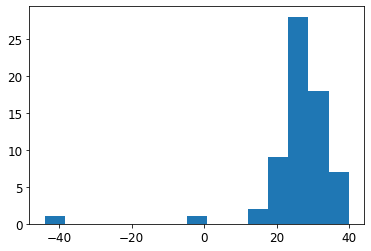

In [4]:
plt.hist(y, bins=15);

### Posterior predictive checking

The model is a 1d example of a normal model with unknown mean and variance.

Assuming a normal likelihood the posterior predictive distribution is a student-t distribution with:

$$\tilde{y} \mid y \sim t_{n-1}(\bar{y}, \, s \, (1 + \frac{1}{n})^{\frac{1}{2}}).$$

We create 9 replicate datasets from the posterior predictive density of the same size as the original dataset.

In [5]:
replicates = (
    np.random.standard_t(n - 1, size=(9, n)) * np.sqrt(1 + 1 / n) * s + my
)

Now plot them in a random order:

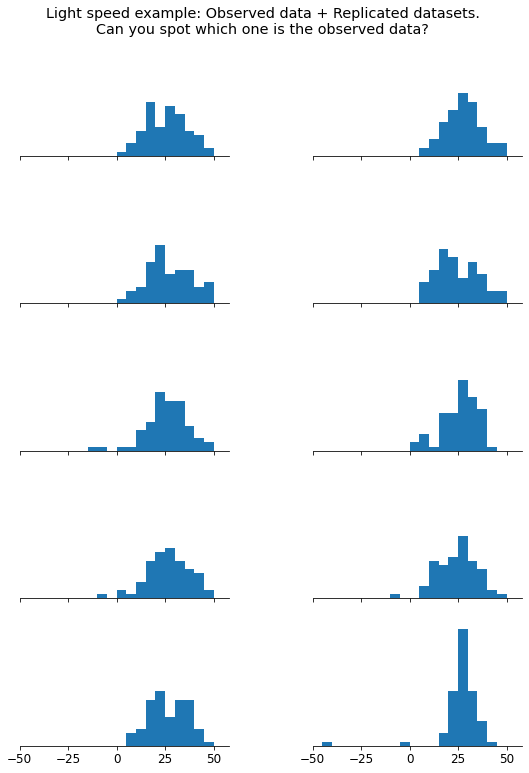

In [6]:
fig, axes = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(9, 12))
fig.subplots_adjust(top=0.95, wspace=0.4)
order = np.random.permutation(10)
for i, ax in enumerate(axes.flat):
    ax.hist(replicates[order[i]] if order[i] < 9 else y, np.arange(-45, 55, 5))
    plot_tools.modify_axes.only_x(ax)
axes[0, 0].set_xlim([-50, 58])
fig.suptitle(
    "Light speed example: Observed data + Replicated datasets.\n"
    "Can you spot which one is the observed data?"
);

### Compare the minimum of the real data set into the minimum of a replicated dataset.

The distribution of the minimum value of a replicated data set can be 
calculated analytically. Consider $n$ samples of $X_i$, where $X_i$ has cumulative distribution function $F(x)$ and probability distribution function $f(x)$. The cumulative distribution function of the minimum of the $n$ samples is $1 - (1 - F(x))^n$ and the probability distribution function is its derivative $n f(x) (1 - F(x))^{n-1}$.

The expression $1 - (1 - F(x))^n$ is the [order statistic](https://en.wikipedia.org/wiki/Order_statistic) for the minimum.

In [7]:
x = np.linspace(-60, 20, 150)
pdf = stats.t.pdf(x, df=n - 1, loc=my, scale=np.sqrt(s2 * (1 + 1 / n)))
cdf = stats.t.cdf(x, df=n - 1, loc=my, scale=np.sqrt(s2 * (1 + 1 / n)))
pdf_min = n * pdf * (1 - cdf) ** (n - 1)

Plot the real minimum of the dataset and the distribution of the minimum of a replicate data set.

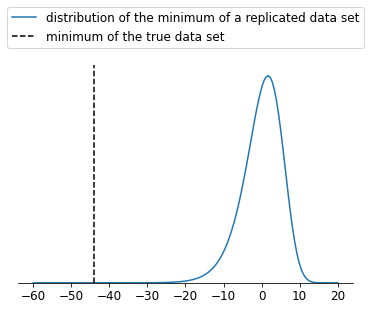

In [8]:
plt.figure()
plot_tools.modify_axes.only_x(plt.gca())
plt.plot(
    x, pdf_min, label="distribution of the minimum of a replicated data set"
)
plt.ylim([0, plt.ylim()[1]])  # set y base to zero
plt.axvline(
    y.min(), color="k", linestyle="--", label="minimum of the true data set"
)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05));